## Buena Vida SA
---

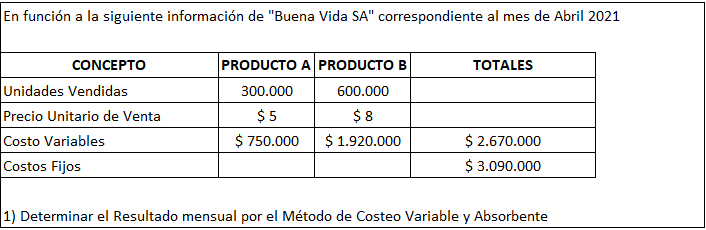

### Importaciones y configuración

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [32]:
# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

### Definición de Datos

In [33]:
# Datos del problema
datos = {
    'Concepto': ['Unidades vendidas', 'Precio unitario de venta', 'Costos variables', 'Costos fijos'],
    'Producto A': [300000, 5, 750000, None],
    'Producto B': [600000, 8, 1920000, None],
    'Totales': [None, None, 2670000, 3090000]
}

df = pd.DataFrame(datos)

In [34]:
# Mostrar datos iniciales
display(HTML("<h3 style='color: #2E86AB;'>DATOS INICIALES DEL PROBLEMA</h3>"))
display(df.style.set_properties(**{'background-color': '#F8F9FA', 
                                  'color': 'black',
                                  'border-color': 'white'})
                  .format(None, na_rep="-")
                  .hide(axis="index"))

display(HTML("<hr style='border: 2px solid #2E86AB;'>"))

Concepto,Producto A,Producto B,Totales
Unidades vendidas,300000.000000,600000.000000,-
Precio unitario de venta,5.000000,8.000000,-
Costos variables,750000.000000,1920000.000000,2670000.000000
Costos fijos,-,-,3090000.000000


### Desarrollo del Cálculo de Costeo Variable

El cálculo del resultado por el método de costeo variable se realiza de la siguiente manera:

- *Ventas Totales:* Se calcula multiplicando las unidades vendidas de cada producto por su respectivo precio unitario de venta y luego sumando ambos resultados.

        Producto A: $300,000 unidades × $5/unidad = $1,500,000
        Producto B: $600,000 unidades × $8/unidad = $4,800,000
        Ventas Totales: $1,500,000 + $4,800,000 = $6,300,000

- *Contribución Marginal Total*: Se obtiene restando los costos variables totales a las ventas totales. La contribución marginal representa el monto de ventas disponible para cubrir los costos fijos y generar utilidades.

        Ventas Totales: $6,300,000
        Costos Variables Totales: $2,670,000
        Contribución Marginal: $6,300,000 - $2,670,000 = $3,630,000

- *Resultado:* Se calcula restando los costos fijos totales a la contribución marginal.

        Contribución Marginal: $3,630,000
        Costos Fijos Totales: $3,090,000
        Resultado: $3,630,000 - $3,090,000 = $540,000

In [35]:
# Función para calcular el costeo variable
def calcular_costeo_variable(df):
    """
    Calcula el resultado por el método de costeo variable
    """
    # Cálculo de ventas
    ventas_A = df.loc[0, 'Producto A'] * df.loc[1, 'Producto A']
    ventas_B = df.loc[0, 'Producto B'] * df.loc[1, 'Producto B']
    ventas_totales = ventas_A + ventas_B
    
    # Costos
    costos_variables = df.loc[2, 'Totales']
    costos_fijos = df.loc[3, 'Totales']
    
    # Contribución marginal
    contribucion_marginal = ventas_totales - costos_variables    

    # Resultado del ejercicio
    resultado = contribucion_marginal - costos_fijos
    
    return {
        'Ventas': ventas_totales,
        'Costos_Variables': costos_variables,
        'Contribucion_Marginal': contribucion_marginal,
        'Costos_Fijos': costos_fijos,
        'Resultado': resultado
    }


In [36]:
resultado_variable = calcular_costeo_variable(df)

display(HTML("<h3 style='color: #A23B72;'>📈 RESULTADO POR COSTEO VARIABLE</h3>"))

# DataFrame vertical
resultado_var_df = pd.DataFrame.from_dict(resultado_variable, orient="index", columns=["Valor"])

# Mostrar con estilo
display(
    resultado_var_df.style
        .format({"Valor": "${:,.0f}"})  # formato moneda
        .set_properties(**{'background-color': '#F7EDF0', 'color': 'black'})
)


,Valor
Ventas,"$6,300,000"
Costos_Variables,"$2,670,000"
Contribucion_Marginal,"$3,630,000"
Costos_Fijos,"$3,090,000"
Resultado,"$540,000"


### Punto de Equilibrio
Para que la empresa alcance el punto de equilibrio, donde el resultado es cero, sus ventas deberían ser iguales a la suma de sus costos fijos y variables, lo que significa que la contribución marginal debería ser igual a los costos fijos. 
 
En este caso, la contribución marginal de $3,630,000 es superior a los costos fijos de $3,090,000, lo que genera una ganancia de 540,000.

Los calculos serían:

    Ventas Totales: $1,500,000 (A) + $4,800,000 (B) = $6,300,000
    Costos Variables Totales: $750,000 (A) + $1,920,000 (B) = $2,670,000
    Contribución Marginal: $6,300,000 - $2,670,000 = $3,630,000
    Resultado: $3,630,000 (Contribución Marginal) - $3,090,000 (Costos Fijos) = $540,000

In [37]:
# Función para calcular el costeo absorbente
def calcular_costeo_absorbente(df):
    """
    Calcula el resultado por el método de costeo absorbente
    """
    # Cálculo de ventas (igual que en costeo variable)
    ventas_A = df.loc[0, 'Producto A'] * df.loc[1, 'Producto A']
    ventas_B = df.loc[0, 'Producto B'] * df.loc[1, 'Producto B']
    ventas_totales = ventas_A + ventas_B
    
    # Costo de mercadería vendida (costos variables + costos fijos)
    costo_total = df.loc[2, 'Totales'] + df.loc[3, 'Totales']
    
    # Resultado bruto
    resultado_bruto = ventas_totales - costo_total
    
    return {
        'Ventas': ventas_totales,
        'Costo_Mercaderia_Vendida': costo_total,
        'Resultado_Bruto': resultado_bruto,
        'Resultado_Final': resultado_bruto
    }


In [ ]:
# Ejecutar cálculos
resultado_absorbente = calcular_costeo_absorbente(df)

display(HTML("<h3 style='color: #A23B72;'>RESULTADO POR COSTEO VARIABLE</h3>"))

# DataFrame vertical
resultado_abs_df = pd.DataFrame.from_dict(resultado_absorbente, orient="index", columns=["Valor"])

# Mostrar con estilo
display(
    resultado_abs_df.style
        .format({"Valor": "${:,.0f}"})  # formato moneda
        .set_properties(**{'background-color': '#F7EDF0', 'color': 'black'})
)


,Valor
Ventas,"$6,300,000"
Costo_Mercaderia_Vendida,"$5,760,000"
Resultado_Bruto,"$540,000"
Resultado_Final,"$540,000"


### Comparación con el Método de Costeo Absorbente

A diferencia del costeo variable, el costeo absorbente incluye tanto los costos variables como los fijos en el costo del producto, por lo que el resultado financiero sería diferente en un escenario con inventario. Dado que el ejercicio solo presenta información de ventas y costos totales para un período, ambos métodos arrojan el mismo resultado porque no hay diferencias en los inventarios iniciales y finales.

El método de costeo variable es particularmente útil para la toma de decisiones gerenciales, como la fijación de precios y el análisis de rentabilidad por producto, ya que enfoca el análisis en la contribución que cada venta genera para cubrir los costos fijos de la empresa.

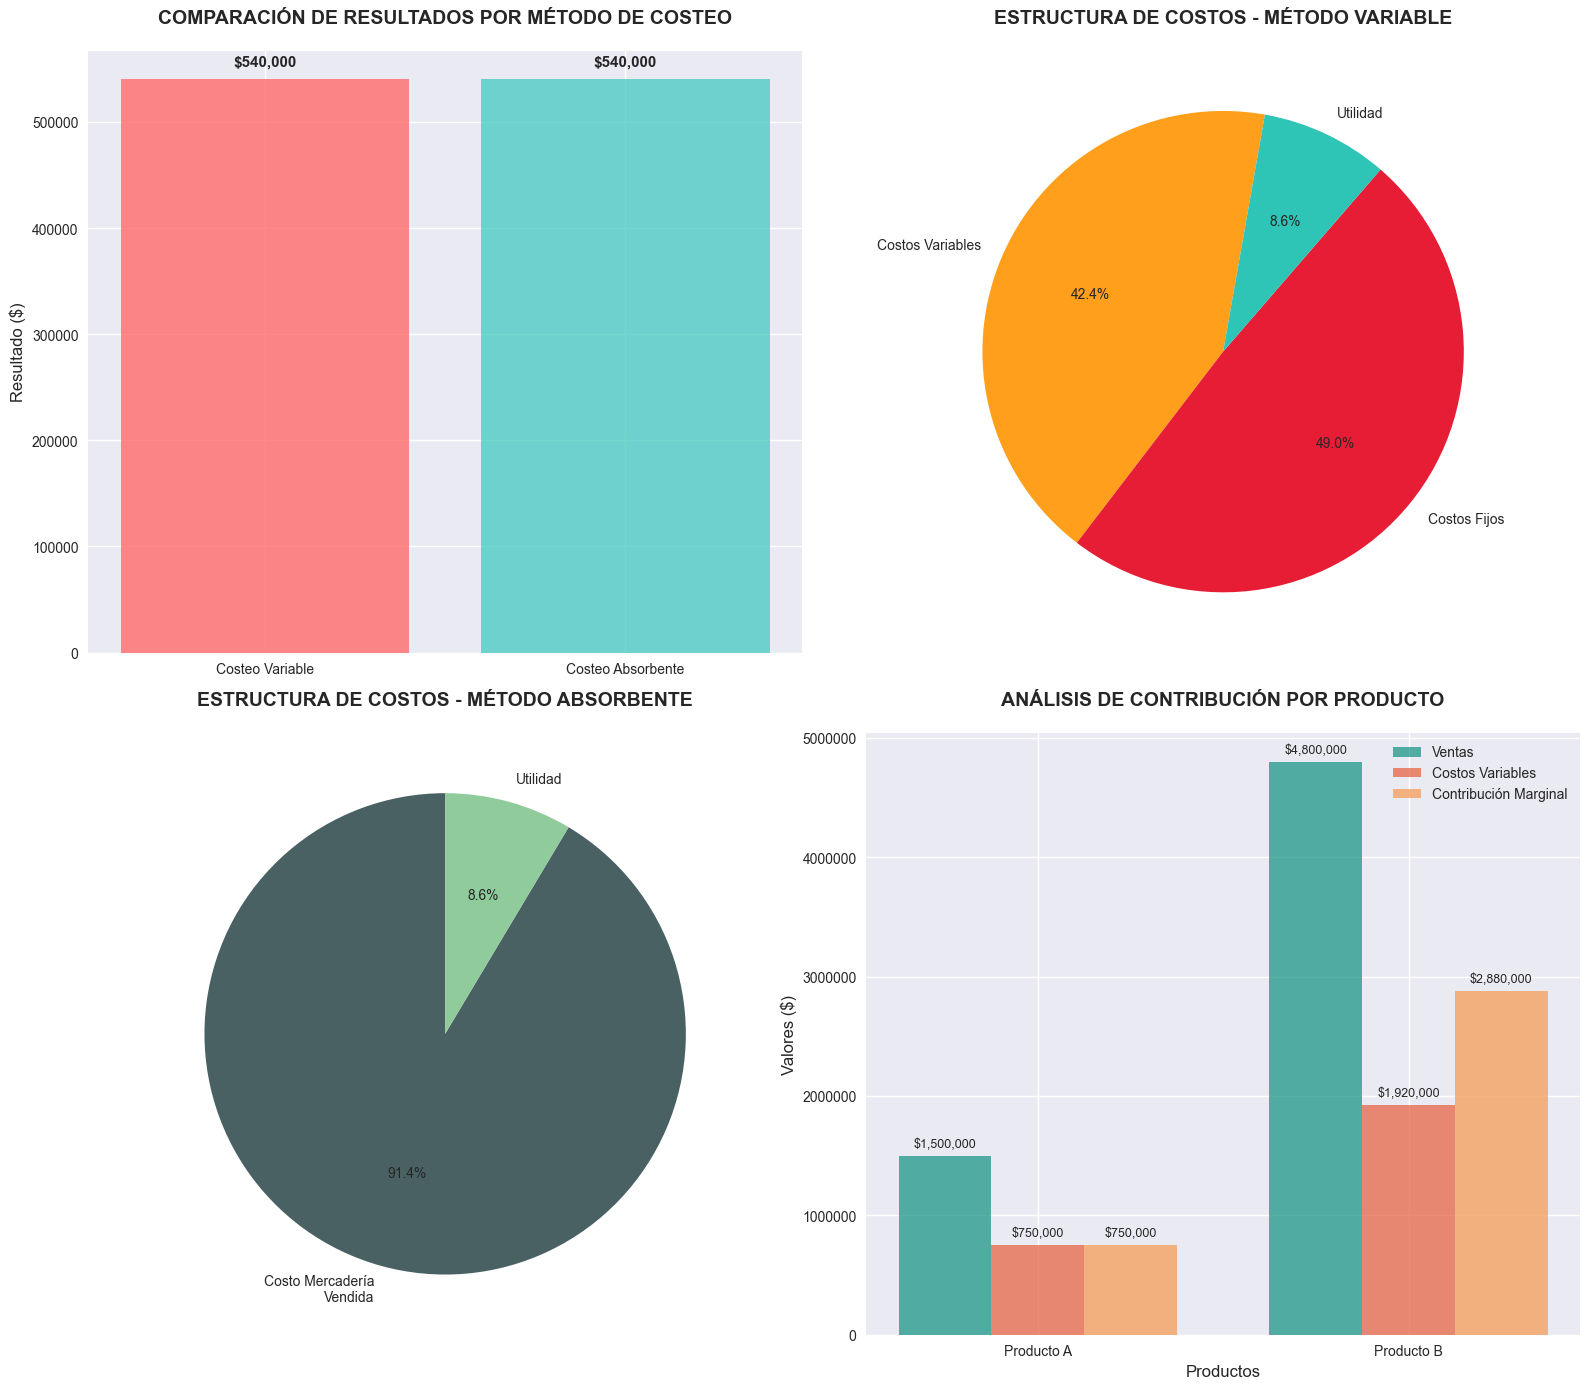

In [44]:

# Crear gráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))

# Gráfico 1: Comparación de métodos de costeo
metodos = ['Costeo Variable', 'Costeo Absorbente']
resultados = [resultado_variable['Resultado'], resultado_absorbente['Resultado_Final']]

bars1 = ax1.bar(metodos, resultados, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax1.set_title('COMPARACIÓN DE RESULTADOS POR MÉTODO DE COSTEO', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylabel('Resultado ($)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
for i, v in enumerate(resultados):
    ax1.text(i, v + 10000, f'${v:,.0f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

# Gráfico 2: Estructura de costos - Costeo Variable
labels_variable = ['Costos Variables', 'Costos Fijos', 'Utilidad']
values_variable = [
    resultado_variable['Costos_Variables'],
    resultado_variable['Costos_Fijos'],
    resultado_variable['Resultado']
]

colors_var = ['#FF9F1C', '#E71D36', '#2EC4B6']
wedges2, texts2, autotexts2 = ax2.pie(values_variable, labels=labels_variable, 
                                     autopct='%1.1f%%', startangle=80, colors=colors_var)
ax2.set_title('ESTRUCTURA DE COSTOS - MÉTODO VARIABLE', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 3: Estructura de costos - Costeo Absorbente
labels_absorbente = ['Costo Mercadería\nVendida', 'Utilidad']
values_absorbente = [
    resultado_absorbente['Costo_Mercaderia_Vendida'],
    resultado_absorbente['Resultado_Final']
]

colors_abs = ["#496163", '#8FCB9B']
wedges3, texts3, autotexts3 = ax3.pie(values_absorbente, labels=labels_absorbente, 
                                     autopct='%1.1f%%', startangle=90, colors=colors_abs)
ax3.set_title('ESTRUCTURA DE COSTOS - MÉTODO ABSORBENTE', 
              fontsize=14, fontweight='bold', pad=20)

# Gráfico 4: Análisis de contribución por producto
productos = ['Producto A', 'Producto B']
ventas_productos = [
    df.loc[0, 'Producto A'] * df.loc[1, 'Producto A'],
    df.loc[0, 'Producto B'] * df.loc[1, 'Producto B']
]
costos_variables_productos = [750000, 1920000]
contribucion_marginal = [ventas_productos[0] - costos_variables_productos[0], 
                         ventas_productos[1] - costos_variables_productos[1]]

x = np.arange(len(productos))
width = 0.25

bars4a = ax4.bar(x - width, ventas_productos, width, label='Ventas', 
                color='#2A9D8F', alpha=0.8)
bars4b = ax4.bar(x, costos_variables_productos, width, label='Costos Variables', 
                color='#E76F51', alpha=0.8)
bars4c = ax4.bar(x + width, contribucion_marginal, width, label='Contribución Marginal', 
                color='#F4A261', alpha=0.8)

ax4.set_xlabel('Productos', fontsize=12)
ax4.set_ylabel('Valores ($)', fontsize=12)
ax4.set_title('ANÁLISIS DE CONTRIBUCIÓN POR PRODUCTO', 
              fontsize=14, fontweight='bold', pad=20)
ax4.set_xticks(x)
ax4.set_xticklabels(productos)
ax4.legend()
ax4.ticklabel_format(style='plain', axis='y')

# Añadir valores en las barras
for bars in [bars4a, bars4b, bars4c]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 50000,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [50]:
# Resumen final con display
display(HTML("""
<div style='background-color: #2E86AB; padding: 20px; border-radius: 10px; color: white;'>
    <h3 style='text-align: center; margin: 0;'>📋 RESUMEN FINAL</h3>
</div>
"""))

resumen_data = {
    'Métrica': ['Resultado Final', 'Ventas Totales', 'Contribución Marginal', 'Rentabilidad'],
    'Valor': [
        f"${resultado_variable['Resultado']:,.0f}",
        f"${resultado_variable['Ventas']:,.0f}", 
        f"${resultado_variable['Contribucion_Marginal']:,.0f}",
        f"{(resultado_variable['Resultado']/resultado_variable['Ventas'])*100:.2f}%"
    ],
    'Análisis': [
        'Ambos métodos coinciden',
        'Total de ingresos por ventas',
        'Ventas - Costos Variables',
        'Resultado/Ventas'
    ]
}

resumen_df = pd.DataFrame(resumen_data)
display(resumen_df.style.set_properties(**{'background-color': '#F8F9FA', 
                                         'color': 'black',
                                         'border': '1px solid #2E86AB'}))


,Métrica,Valor,Análisis
0,Resultado Final,"$540,000",Ambos métodos coinciden
1,Ventas Totales,"$6,300,000",Total de ingresos por ventas
2,Contribución Marginal,"$3,630,000",Ventas - Costos Variables
3,Rentabilidad,8.57%,Resultado/Ventas
